In [1]:
import cv2
import numpy as np

In [2]:
# Load Yolo
net = cv2.dnn.readNet("./yolov3-df2_15000.weights", "./yolov3-df2.cfg")
classes = []
with open("df2.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [3]:
# Loading image
img = cv2.imread("./anchor.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [4]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [5]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [6]:

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [7]:
font = cv2.FONT_HERSHEY_PLAIN
rectanglecontour=()
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[10]
        cv2.rectangle(img, (x, y), (x + w, y + h), 2)
        print(label)
        #rectanglecontour=(x,y,x+w,y+h)
        print(rectanglecontour)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        
        if(i==0):
            
            rectanglecontour=(x,y,x+w,y+h)
        
cv2.imwrite("./contour.jpg", img)

Topwear
()
shorts
(52, 111, 225, 343)


True

In [8]:
rectanglecontour

(52, 111, 225, 343)

In [9]:
img = cv2.imread('./contour.jpg')
mask = np.full((img.shape[0], img.shape[1]), 255, dtype=np.uint8) 
cv2.imwrite("./mask.jpg", mask)

#mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
# Create a background array to hold white pixels
fgdModel = np.zeros((1,65),np.float64)
rect =rectanglecontour
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
cv2.imwrite("./final.jpg", img)

True

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os 

In [11]:
product_df = pd.read_csv('./styles.csv')

product_df['productImage'] = product_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
product_df = product_df.reset_index(drop=True)
product_df.head(10)

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
6  30805    Men        Apparel     Topwear       Shirts      Green  Summer   
7  26960  Women        Apparel     Topwear       Shirts     Purple  Summer   
8  29114    Men    Accessories       Socks        Socks  Navy Blue  Summer   
9  30039    Men    Accessories     Watches      Watches      Black  Winter   

     year   usage                             productDisplayName Unnamed: 10  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt         NaN   
1  2012.0  Casual             Peter England Men Party Blue Jeans         NaN   
2  2016.0  Casual                       Titan Women Silver Watch         NaN   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants         NaN   
4  2012.0  Casual                          Puma Men Grey T-shirt         NaN   
5  2011.0  Casual           Inkfruit Mens Chain Reaction T-shirt         NaN   
6  2012.0  Ethnic               Fabindia Men Striped Green Shirt         NaN   
7  2012.0  Casual                  Jealous 21 Women Purple Shirt         NaN   
8  2012.0  Casual                       Puma Men Pack of 3 Socks         NaN   
9  2016.0  Casual                         Skagen Men Black Watch         NaN   

  Unnamed: 11 productImage  
0         NaN    15970.jpg  
1         NaN    39386.jpg  
2         NaN    59263.jpg  
3         NaN    21379.jpg  
4         NaN    53759.jpg  
5         NaN     1855.jpg  
6         NaN    30805.jpg  
7         NaN    26960.jpg  
8         NaN    29114.jpg  
9         NaN    30039.jpg

In [12]:
product_df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'Unnamed: 10', 'Unnamed: 11', 'productImage'],
      dtype='object')

In [13]:
product_df=product_df.drop(['gender','id','Unnamed: 10','Unnamed: 11','usage','season','year','productDisplayName'], axis=1)

<AxesSubplot:>

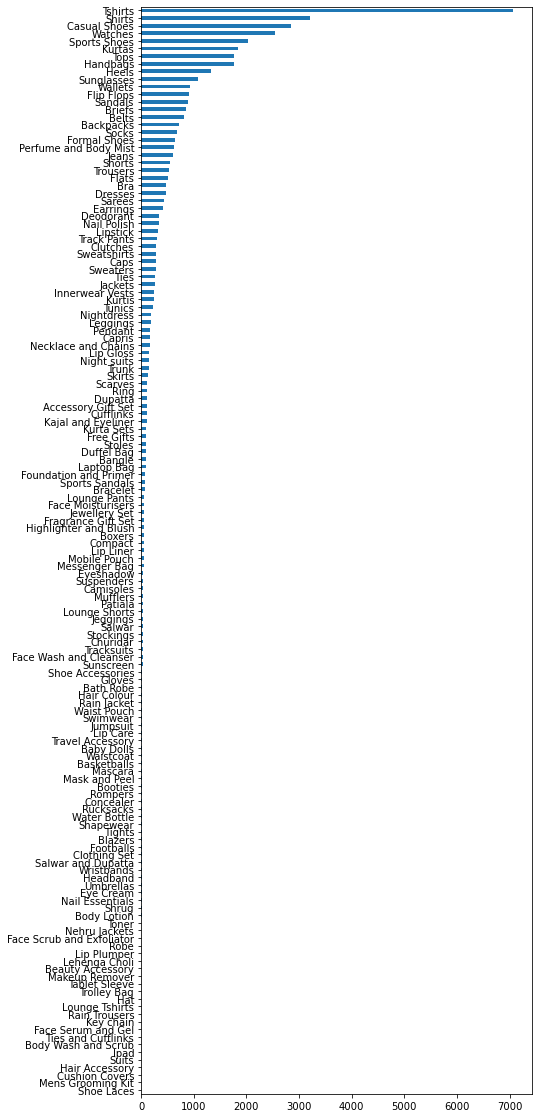

In [14]:
plt.figure(figsize=(7,20))
product_df.articleType.value_counts().sort_values().plot(kind='barh')

In [15]:
product_df.head()

masterCategory subCategory  articleType baseColour productImage
0        Apparel     Topwear       Shirts  Navy Blue    15970.jpg
1        Apparel  Bottomwear        Jeans       Blue    39386.jpg
2    Accessories     Watches      Watches     Silver    59263.jpg
3        Apparel  Bottomwear  Track Pants      Black    21379.jpg
4        Apparel     Topwear      Tshirts       Grey    53759.jpg

In [16]:
#product_df.gender.value_counts()

In [17]:
columns=['masterCategory','subCategory','articleType','baseColour']

In [18]:
product_df.masterCategory.value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [19]:
product_df.subCategory.value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [20]:
product_df.articleType.value_counts()

Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Ipad                      1
Suits                     1
Body Wash and Scrub       1
Hair Accessory            1
Shoe Laces                1
Name: articleType, Length: 143, dtype: int64

In [21]:
product_df.baseColour.value_counts()

Black                9732
White                5540
Blue                 4922
Brown                3494
Grey                 2741
Red                  2458
Green                2116
Pink                 1861
Navy Blue            1791
Purple               1643
Silver               1090
Yellow                779
Beige                 749
Gold                  629
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

In [22]:
testdf=product_df.groupby(['masterCategory','subCategory','articleType','baseColour']).agg({'productImage':'sum'})

In [23]:
testdf.head(10)

productImage
masterCategory subCategory articleType        baseColour                                                   
Accessories    Accessories Accessory Gift Set Black       31187.jpg19926.jpg31186.jpg23114.jpg25076.jpg2...
                                              Blue        19929.jpg17366.jpg25047.jpg23115.jpg25046.jpg2...
                                              Brown       25055.jpg31204.jpg25064.jpg25062.jpg25065.jpg2...
                                              Grey                              25049.jpg25084.jpg23105.jpg
                                              Maroon      58920.jpg17367.jpg23106.jpg17368.jpg17372.jpg2...
                                              Multi                                               58921.jpg
                                              Navy Blue                         25063.jpg23100.jpg25077.jpg
                                              Pink                                       23101.jpg25072.jpg
                                              Purple      17369.jpg23108.jpg17359.jpg17361.jpg25054.jpg2...
                                              Red         17360.jpg23112.jpg25083.jpg19933.jpg58924.jpg1...

In [24]:
testdf.shape

(1937, 1)

In [25]:
testdf=testdf.reset_index(level=['masterCategory','subCategory','articleType','baseColour'])

In [26]:
testdf.head(20)

masterCategory  subCategory         articleType      baseColour  \
0     Accessories  Accessories  Accessory Gift Set           Black   
1     Accessories  Accessories  Accessory Gift Set            Blue   
2     Accessories  Accessories  Accessory Gift Set           Brown   
3     Accessories  Accessories  Accessory Gift Set            Grey   
4     Accessories  Accessories  Accessory Gift Set          Maroon   
5     Accessories  Accessories  Accessory Gift Set           Multi   
6     Accessories  Accessories  Accessory Gift Set       Navy Blue   
7     Accessories  Accessories  Accessory Gift Set            Pink   
8     Accessories  Accessories  Accessory Gift Set          Purple   
9     Accessories  Accessories  Accessory Gift Set             Red   
10    Accessories  Accessories  Accessory Gift Set             Tan   
11    Accessories  Accessories  Accessory Gift Set  Turquoise Blue   
12    Accessories  Accessories  Accessory Gift Set          Yellow   
13    Accessories  Accessories      Hair Accessory            Pink   
14    Accessories  Accessories           Key chain           Black   
15    Accessories  Accessories       Messenger Bag           Black   
16    Accessories  Accessories       Messenger Bag            Blue   
17    Accessories  Accessories       Messenger Bag           Khaki   
18    Accessories  Accessories       Messenger Bag           Multi   
19    Accessories  Accessories       Messenger Bag       Navy Blue   

                                         productImage  
0   31187.jpg19926.jpg31186.jpg23114.jpg25076.jpg2...  
1   19929.jpg17366.jpg25047.jpg23115.jpg25046.jpg2...  
2   25055.jpg31204.jpg25064.jpg25062.jpg25065.jpg2...  
3                         25049.jpg25084.jpg23105.jpg  
4   58920.jpg17367.jpg23106.jpg17368.jpg17372.jpg2...  
5                                           58921.jpg  
6                         25063.jpg23100.jpg25077.jpg  
7                                  23101.jpg25072.jpg  
8   17369.jpg23108.jpg17359.jpg17361.jpg25054.jpg2...  
9   17360.jpg23112.jpg25083.jpg19933.jpg58924.jpg1...  
10                                          37638.jpg  
11                                          25066.jpg  
12                                 25057.jpg23111.jpg  
13                                          58600.jpg  
14                                 43230.jpg42066.jpg  
15      18435.jpg38735.jpg40764.jpg17630.jpg15654.jpg  
16                                          50429.jpg  
17                                          50428.jpg  
18                                          38736.jpg  
19                                          41854.jpg

In [27]:
my_string='18525.jpg18527.jpg18532.jpg'
counter = my_string.count(".jpg")
item=my_string.split(".jpg",counter)
print(my_string.split(".jpg",counter))
print(type(item[0]))

['18525', '18527', '18532', '']
<class 'str'>


In [28]:
for imageIndex in range(testdf.productImage.count()):
    #print(mainDf['encodedCategory'][ind], mainDf['Week'][ind]) 
    #print(testdf['productImage'][imageIndex])
    imageName=testdf['productImage'][imageIndex]
    #print(imageName)
    counter = imageName.count(".jpg")
    #print(counter)
    imageList=imageName.split(".jpg",counter)
    if counter<=1:
        testdf['productImage'][imageIndex]= np.nan
    else :
        testdf['productImage'][imageIndex]=imageList
    
        
    
  
        
        
    

In [29]:
testdf.tail(500)

masterCategory       subCategory articleType baseColour  \
1437        Footwear            Sandal     Sandals      Green   
1438        Footwear            Sandal     Sandals       Grey   
1439        Footwear            Sandal     Sandals      Khaki   
1440        Footwear            Sandal     Sandals     Maroon   
1441        Footwear            Sandal     Sandals      Multi   
...              ...               ...         ...        ...   
1932  Sporting Goods  Sports Equipment   Footballs     Orange   
1933  Sporting Goods  Sports Equipment   Footballs      White   
1934  Sporting Goods        Wristbands  Wristbands      Black   
1935  Sporting Goods        Wristbands  Wristbands        Red   
1936  Sporting Goods        Wristbands  Wristbands      White   

                                           productImage  
1437  [4112, 22248, 15858, 13973, 15888, 40308, 7985...  
1438  [19927, 42011, 41455, 43957, 43959, 2227, 6826...  
1439  [44520, 22883, 22885, 39282, 39283, 39284, 435...  
1440                                                NaN  
1441                             [18493, 2802, 35556, ]  
...                                                 ...  
1932                                                NaN  
1933                   [2355, 1553, 1552, 1550, 1627, ]  
1934                                    [42830, 8934, ]  
1935                                                NaN  
1936                                                NaN  

[500 rows x 5 columns]

In [30]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   masterCategory  1937 non-null   object
 1   subCategory     1937 non-null   object
 2   articleType     1937 non-null   object
 3   baseColour      1937 non-null   object
 4   productImage    1359 non-null   object
dtypes: object(5)
memory usage: 75.8+ KB


In [31]:
testdf=testdf.dropna(axis=0)
testdf=testdf.reset_index(drop=True)

In [32]:
testdf.shape

(1359, 5)

In [33]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  
testdf['encodedArticleType']= label_encoder.fit_transform(testdf['articleType'])

In [35]:
testdf.head(40)

masterCategory  subCategory         articleType baseColour  \
0     Accessories  Accessories  Accessory Gift Set      Black   
1     Accessories  Accessories  Accessory Gift Set       Blue   
2     Accessories  Accessories  Accessory Gift Set      Brown   
3     Accessories  Accessories  Accessory Gift Set       Grey   
4     Accessories  Accessories  Accessory Gift Set     Maroon   
5     Accessories  Accessories  Accessory Gift Set  Navy Blue   
6     Accessories  Accessories  Accessory Gift Set       Pink   
7     Accessories  Accessories  Accessory Gift Set     Purple   
8     Accessories  Accessories  Accessory Gift Set        Red   
9     Accessories  Accessories  Accessory Gift Set     Yellow   
10    Accessories  Accessories           Key chain      Black   
11    Accessories  Accessories       Messenger Bag      Black   
12    Accessories  Accessories    Travel Accessory      Black   
13    Accessories  Accessories    Travel Accessory       Blue   
14    Accessories  Accessories        Water Bottle      Black   
15    Accessories         Bags           Backpacks      Beige   
16    Accessories         Bags           Backpacks      Black   
17    Accessories         Bags           Backpacks       Blue   
18    Accessories         Bags           Backpacks      Brown   
19    Accessories         Bags           Backpacks      Green   
20    Accessories         Bags           Backpacks       Grey   
21    Accessories         Bags           Backpacks    Mustard   
22    Accessories         Bags           Backpacks  Navy Blue   
23    Accessories         Bags           Backpacks      Olive   
24    Accessories         Bags           Backpacks     Orange   
25    Accessories         Bags           Backpacks       Pink   
26    Accessories         Bags           Backpacks     Purple   
27    Accessories         Bags           Backpacks        Red   
28    Accessories         Bags           Backpacks       Teal   
29    Accessories         Bags           Backpacks      White   
30    Accessories         Bags           Backpacks     Yellow   
31    Accessories         Bags            Clutches      Beige   
32    Accessories         Bags            Clutches      Black   
33    Accessories         Bags            Clutches       Blue   
34    Accessories         Bags            Clutches     Bronze   
35    Accessories         Bags            Clutches      Brown   
36    Accessories         Bags            Clutches     Copper   
37    Accessories         Bags            Clutches      Cream   
38    Accessories         Bags            Clutches       Gold   
39    Accessories         Bags            Clutches      Green   

                                         productImage  encodedArticleType  
0   [31187, 19926, 31186, 23114, 25076, 25082, 250...                   0  
1   [19929, 17366, 25047, 23115, 25046, 25070, 199...                   0  
2   [25055, 31204, 25064, 25062, 25065, 25053, 312...                   0  
3                             [25049, 25084, 23105, ]                   0  
4   [58920, 17367, 23106, 17368, 17372, 25079, 199...                   0  
5                             [25063, 23100, 25077, ]                   0  
6                                    [23101, 25072, ]                   0  
7   [17369, 23108, 17359, 17361, 25054, 23109, 231...                   0  
8   [17360, 23112, 25083, 19933, 58924, 17364, 231...                   0  
9                                    [25057, 23111, ]                   0  
10                                   [43230, 42066, ]                  55  
11              [18435, 38735, 40764, 17630, 15654, ]                  71  
12  [14894, 24834, 9572, 51330, 39527, 15928, 5132...                 115  
13                                   [14893, 51329, ]                 115  
14                                     [3472, 3473, ]                 126  
15                      [25206, 36049, 1790, 36065, ]                   2  
16  [12732, 19920, 19918, 46623, 22968, 58146

In [34]:
testdf = testdf.sample(frac = 1) 
testdf = testdf.reset_index(drop=True)

In [35]:
train_image = []
train_labels = []
shape = (80,80)
for i in tqdm(range(testdf.shape[0])):
    '''
    img = image.load_img('./images/'+testdf['productImage'][i][0]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    '''
    
    for m in range(len(testdf.productImage[i])-1):
    #for m in range(0,2):       
        #print(testdf['masterCategory'][i])
        train_labels.append(testdf['masterCategory'][i])
        #print(testdf['productImage'][i][m])
        img = cv2.imread('./images/'+testdf['productImage'][i][m]+'.jpg')
        img = cv2.resize(img,shape)
        train_image.append(img)
           
    
X = np.array(train_image)
# Converting labels into One Hot encoded sparse matrix
y = pd.get_dummies(train_labels).values


100%|██████████| 1359/1359 [19:44<00:00,  1.15it/s] 


In [36]:
from pandas import DataFrame

#People_List = train_labels

df = DataFrame (train_labels,columns=['category'])
df.category.value_counts()


Apparel           21170
Accessories       11123
Footwear           9179
Personal Care      2278
Free Items           86
Sporting Goods       17
Name: category, dtype: int64

In [37]:
def my_function(x):
  return list(dict.fromkeys(x))

mylist = my_function(train_labels)

product_dict = {}
keys = range(len(mylist))
print(keys)
values = train_labels
for i in keys:
        
        product_dict[i] = mylist[i]


range(0, 6)


In [38]:
X.shape

(43853, 80, 80, 3)

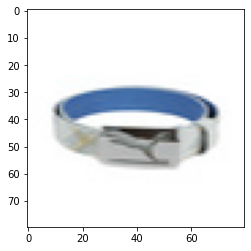

In [39]:
plt.imshow(X[154])

In [36]:

from tensorflow.keras.applications.resnet50 import ResNet50

In [39]:
base_model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(80, 80, 3))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [43]:
'''
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='sigmoid'))
variables_for_classification=1 #change it as per your number of categories
model.add(Dense(6, activation='softmax'))


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
'''

'\nmodel = Sequential()\nmodel.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(80,80,3)))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=32, kernel_size=(5, 5), activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation=\'relu\'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(128, activation=\'sigmoid\'))\nvariables_for_classification=1 #change it as per your number of categories\nmodel.add(Dense(6, activation=\'softmax\'))\n\n\nmodel = tf.keras.models.Sequential([\n    # Note the input shape is the desired size of the image 150x150 with 3 bytes color\n 

In [37]:
from __future__ import print_function
from tensorflow import keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k

In [40]:
#model= Sequential()
model=tf.keras.Sequential()
model = Sequential(base_model)
model.add(Flatten())

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [42]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
Dense(128,activation=('relu'))
#model.add(Dropout(.2))
model.add(Dense(6,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              18875392  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

[0 1 0 0 0 0]


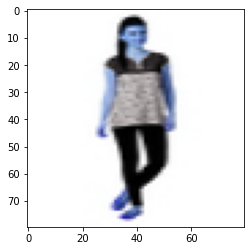

In [49]:
print(y[25])
plt.imshow(X[25])

In [50]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose = 1)

#history = model.fit_generator(X_train, y_train, epochs=25, validation_data =( X_test, y_test), verbose = 1, callbacks=[es])

1234/1234 [==============================] - 4349s 4s/step - loss: 0.1617 - accuracy: 0.8930 - val_loss: 0.2781 - val_accuracy: 0.8810


In [51]:
def mastercategory(testImage):
    test_image=[]
    shape = (80,80)
    img = cv2.imread(testImage)
    img = cv2.resize(img,shape)        
    test_image.append(img)
    testImage = np.array(test_image)


    predict = model.predict(testImage)

    print(predict)
    print(np.argmax(predict))

    output = {0: 'Accessories', 1: 'Apparel', 2: 'Footwear', 3: 'Free Items', 4: 'Personal Care', 5: 'Sporting Goods'}
    

    print("Predicted :- ",output[np.argmax(predict)])

    return output[np.argmax(predict)]

In [52]:
mastercategory('./final.jpg')

[[0.2737711  0.35032508 0.31942797 0.01577217 0.03414458 0.00655913]]
1
Predicted :-  Apparel


'Apparel'

In [44]:
import os
import numpy as np
from numpy.linalg import norm
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_v3 import InceptionV3
import math
from sklearn.preprocessing import normalize

from keras.applications.vgg16 import preprocess_input


In [45]:
resnet50= ResNet50(weights='imagenet', include_top=False,
                 input_shape=(80, 80, 3))
#print(resnet50.summary())

modelFeature= Sequential()
modelFeature.add(resnet50) 
#model = tf.keras.Sequential()
#model.add(resnet50)
modelFeature.add(Flatten())
modelFeature.add(Dense(4096,activation=('relu'),input_dim=512))
modelFeature.add(Dense(4096,activation=('relu'))) 
modelFeature.add(Dense(1000,activation=('relu'))) 
modelFeature.add(tf.keras.layers.Embedding(100, 1, input_length=1000))
modelFeature.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelFeature.summary()

        

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              75501568  
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
embedding (Embedding)        (None, 1000, 1)           100       
Total params: 119,967,692
Trainable params: 119,914,572
Non-trainable params: 53,120
___________________________________

In [46]:
from keras.preprocessing import image

In [47]:

def extract_features(img_path, model):
    input_shape = (80, 80, 3)
    imageload = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(imageload)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    
    flattened_features = features.flatten()
    
    #normalized_feature = features / np.linalg.norm(features)
    normalized_feature = flattened_features / norm(flattened_features)    
    return features

In [640]:
features_anchor=extract_features('./final.jpg',modelFeature)

In [138]:
features_positive=extract_features('./anchor2.jpg',modelFeature)

In [139]:
features_negative=extract_features('./anchor3.jpg',modelFeature)

In [141]:
from scipy import spatial
#print(features_negative)
result = 1-spatial.distance.cosine(features_test, features_negative)
print(result)

0.6959734559059143


In [144]:
d_ap=spatial.distance.cosine(features_anchor, features_positive)
d_an=spatial.distance.cosine(features_anchor, features_negative)
margin=0.2


loss = tf.maximum(0.0, margin + d_ap - d_an)
print(loss)

tf.Tensor(0.19074745, shape=(), dtype=float32)


(1359, 3, 80, 80, 3)

array([0, 0, 0, 0, 1, 0])

In [49]:
import tensorflow_addons as tfa

import os
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.datasets import mnist

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform,he_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.utils import plot_model,normalize
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve,roc_auc_score
from keras.regularizers import l2
#import keras.backend as K

In [50]:
def tripletLoss(anchor,positive,negative):
    d_ap=spatial.distance.cosine(anchor, positive)
    d_an=spatial.distance.cosine(anchor, negative)
    margin=0.2
    loss=np.maximum(d_ap - d_an + margin, 0)
    return loss
    

In [51]:
loss=[]
from statistics import mean
def similarityScore(anchor,postive,negative,network):
    features_anchor=extract_features(anchor,modelFeature)
    featurepostiveBatch_1=extract_features(postive[0],modelFeature)
    featurepostiveBatch_2=extract_features(postive[1],modelFeature)
    featureNagetive=extract_features(negative,modelFeature)
    loss.append(tripletLoss(features_anchor,featurepostiveBatch_1,featureNagetive))
    loss.append(tripletLoss(features_anchor,featurepostiveBatch_2,featureNagetive))
    return mean(loss) 
    
    
    
    
    
    


In [70]:
import random
from scipy import spatial

In [71]:
categoryList=[]
anchorBatch=[]
scoreList=[]
recommendation={}

def productRecommendation(searchImage):
    
    #masterCategory=mastercategory(searchImage)
    categoryList.append('Apparel')
    #filterImage_masterCategory = testdf[testdf['masterCategory']==masterCategory,productImage]
    filterImage_masterCategory = testdf[testdf.masterCategory.isin(category)]
    for i in range(filterImage_masterCategory.shape[0]):
        #print(i)
        archorList=filterImage_masterCategory['productImage'].iloc[i]
        #print(archorList)
        #randomIndex=random.randint(0,len(archorBatch)-1)
        indexAnchor=random.sample(range(0,len(archorList)-1),2)
     
        anchor1='./images/'+filterImage_masterCategory['productImage'].iloc[i][indexAnchor[0]]+'.jpg'
        anchor2='./images/'+filterImage_masterCategory['productImage'].iloc[i][indexAnchor[1]]+'.jpg'
        anchorBatch=[anchor1,anchor2]
        randomIndex=random.randint(0,filterImage_masterCategory.shape[0]-1)
        negative='./images/'+filterImage_masterCategory['productImage'].iloc[randomIndex][0]+'.jpg'
        score=similarityScore(searchImage,anchorBatch,negative,modelFeature)
        
        index=filterImage_masterCategory.index[i]
        scoreList.append(score)
        recommendation.update({index: score})
        
        #print(score)
        '''
        print(index)
       
        #recommendation.add(index, score) 
        
        #print(filterImage_masterCategory['articleType'].iloc[i])
        #print(filterImage_masterCategory['baseColour'].iloc[i])
        
        if score<=0.10:
            
            print(filterImage_masterCategory['subCategory'].iloc[i])
            print(filterImage_masterCategory['articleType'].iloc[i])
            print(filterImage_masterCategory['baseColour'].iloc[i])
         '''   
    return recommendation,filterImage_masterCategory
    

In [72]:
testdf.head()

masterCategory  subCategory         articleType baseColour  \
0    Accessories  Accessories  Accessory Gift Set      Black   
1    Accessories  Accessories  Accessory Gift Set       Blue   
2    Accessories  Accessories  Accessory Gift Set      Brown   
3    Accessories  Accessories  Accessory Gift Set       Grey   
4    Accessories  Accessories  Accessory Gift Set     Maroon   

                                        productImage  encodedArticleType  
0  [31187, 19926, 31186, 23114, 25076, 25082, 250...                   0  
1  [19929, 17366, 25047, 23115, 25046, 25070, 199...                   0  
2  [25055, 31204, 25064, 25062, 25065, 25053, 312...                   0  
3                            [25049, 25084, 23105, ]                   0  
4  [58920, 17367, 23106, 17368, 17372, 25079, 199...                   0

In [73]:
category=['Apparel']
filterImage_masterCategory = testdf[testdf.masterCategory.isin(category)]


In [74]:
recommendation,filterImage_masterCategory=productRecommendation('./final.jpg')

0.1994216928676683


In [75]:
filterImage_masterCategory.head()

masterCategory  subCategory   articleType baseColour  \
395        Apparel  Apparel Set  Clothing Set       Blue   
396        Apparel  Apparel Set  Clothing Set        Red   
397        Apparel  Apparel Set  Clothing Set      White   
398        Apparel  Apparel Set    Kurta Sets      Beige   
399        Apparel  Apparel Set    Kurta Sets      Black   

                                          productImage  encodedArticleType  
395                            [35895, 36753, 36748, ]                  20  
396                                   [35888, 36745, ]                  20  
397                                   [36746, 36747, ]                  20  
398                            [54715, 54704, 25590, ]                  56  
399  [39140, 25587, 21924, 54724, 54712, 53812, 255...                  56

In [76]:
import operator
sortedLoss = {k: v for k, v in sorted(recommendation.items(), key=lambda item: item[1])}

In [79]:
indexMatch=list(sortedLoss)[:2]
#filterImage_masterCategory.loc[ 1334 , 'productImage' ]
print(indexMatch)

[429, 428]


429


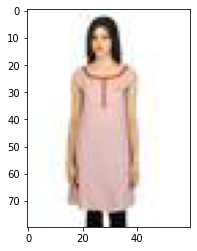

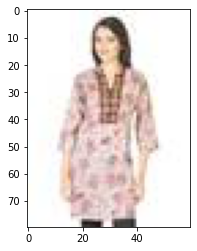

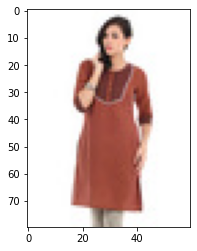

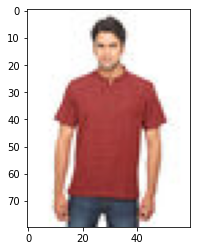

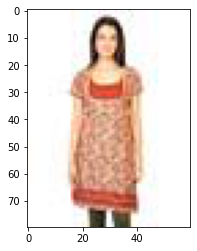

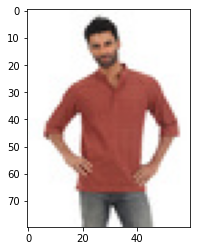

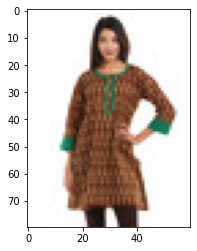

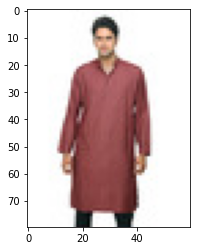

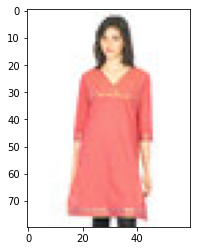

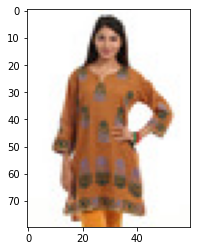

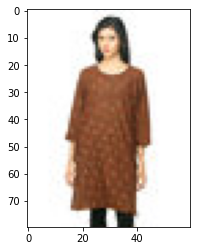

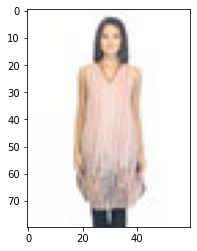

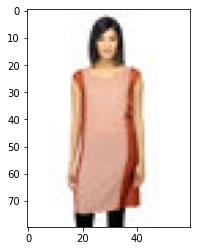

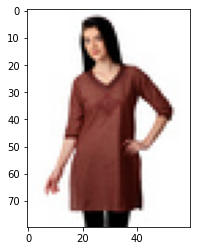

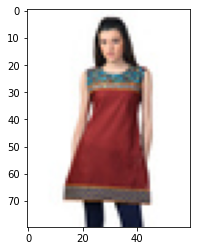

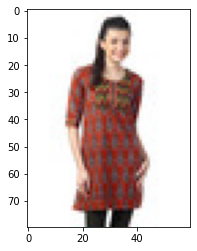

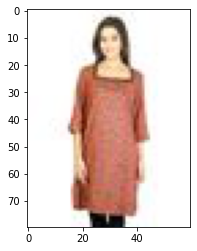

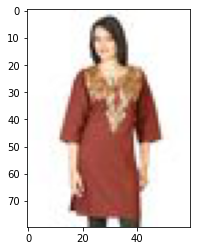

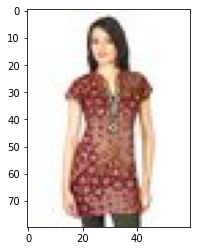

428


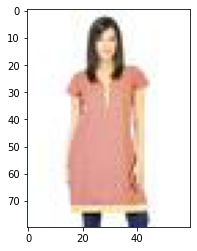

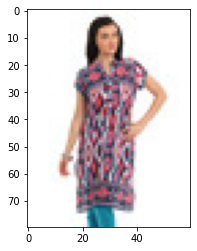

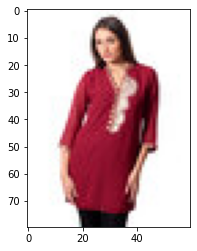

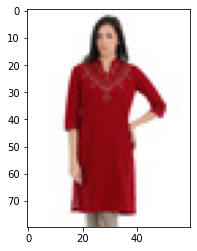

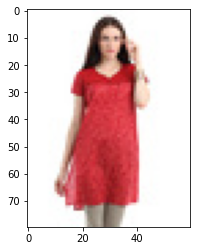

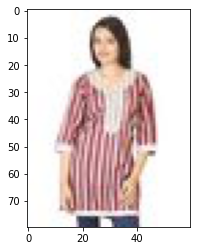

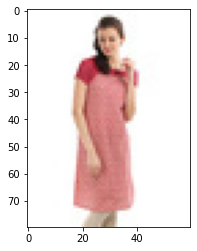

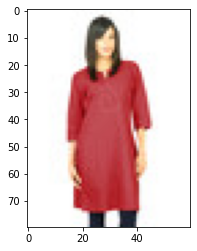

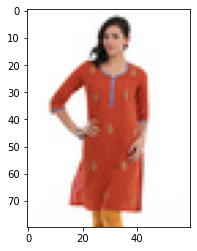

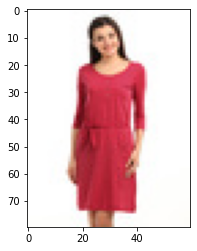

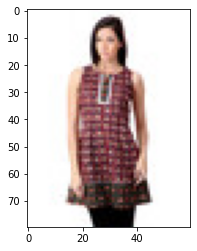

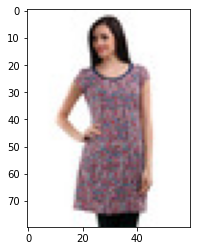

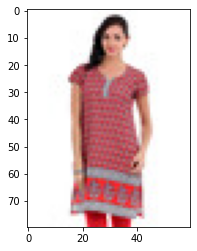

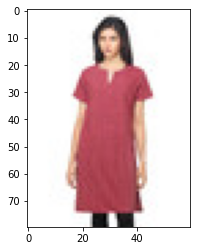

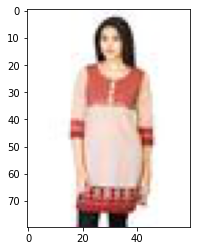

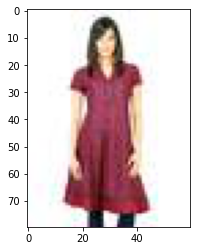

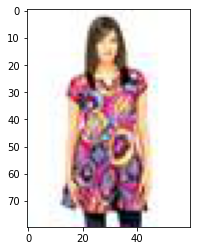

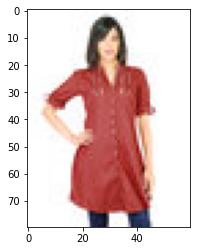

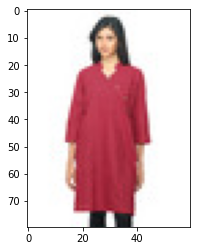

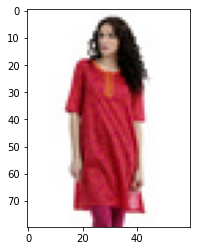

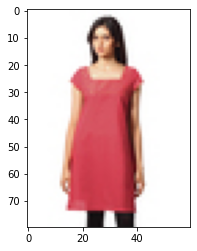

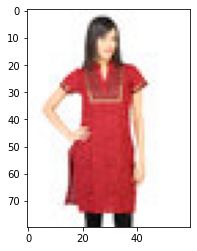

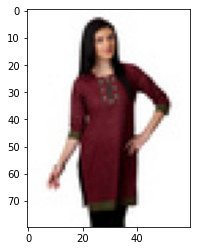

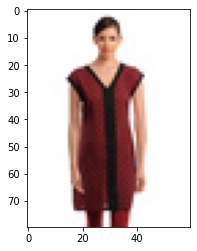

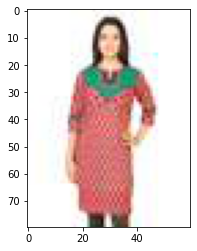

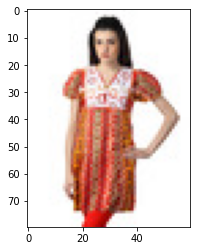

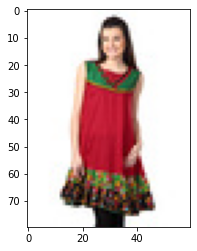

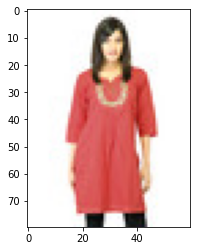

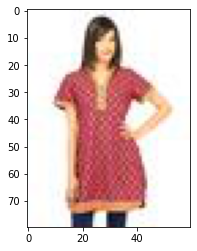

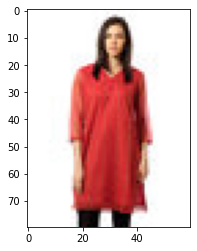

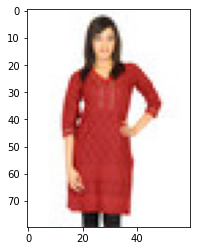

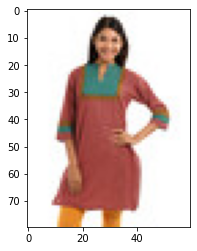

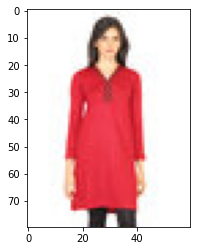

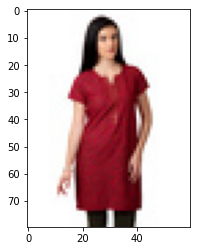

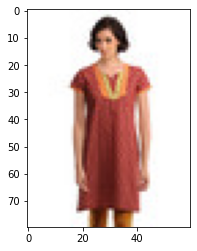

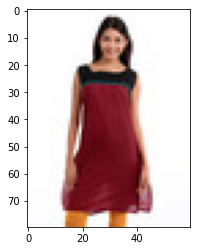

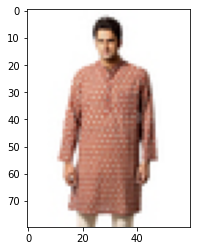

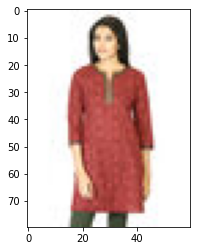

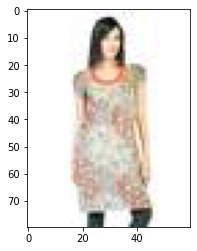

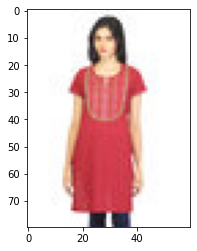

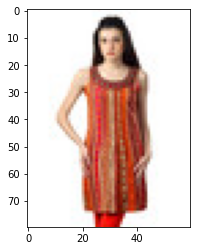

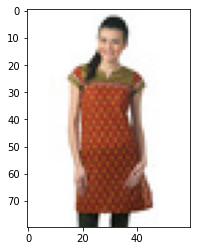

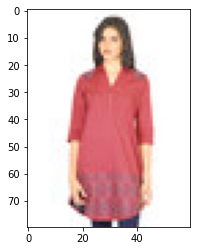

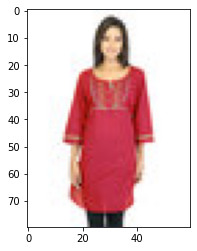

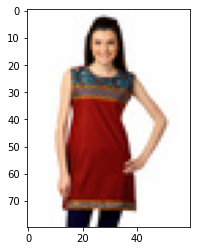

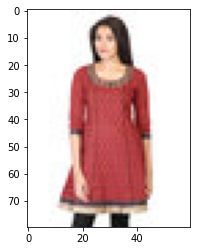

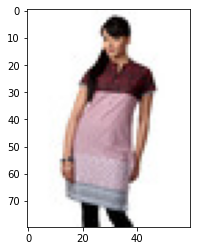

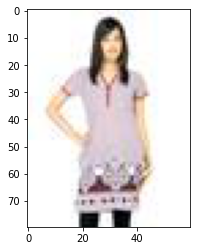

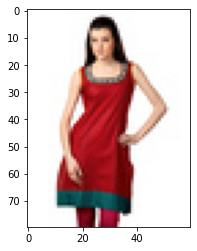

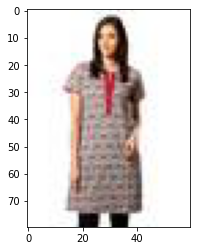

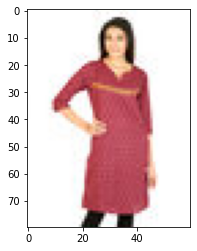

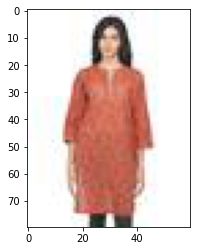

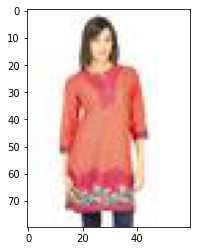

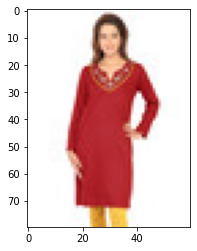

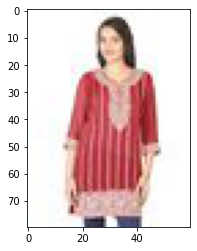

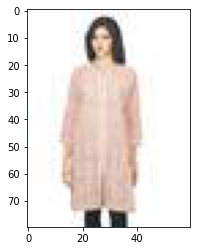

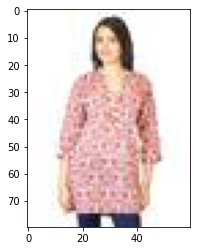

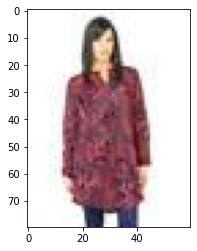

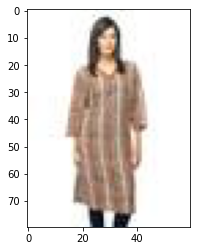

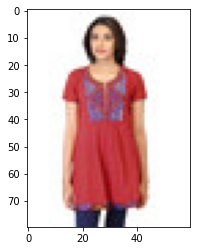

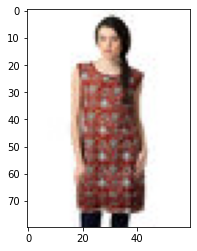

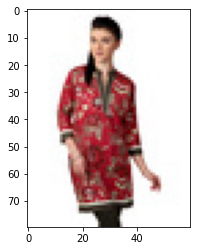

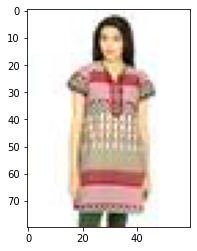

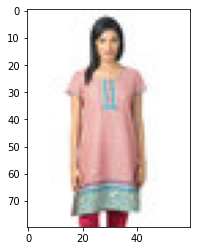

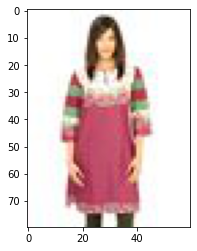

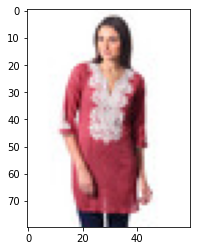

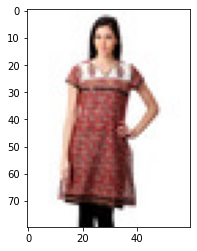

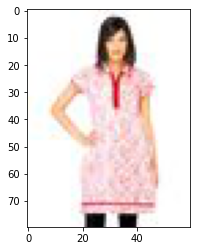

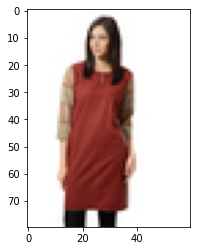

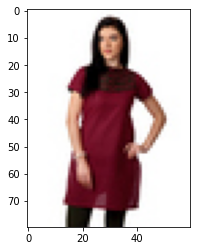

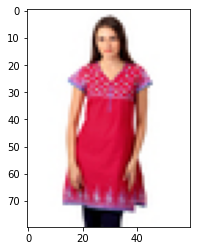

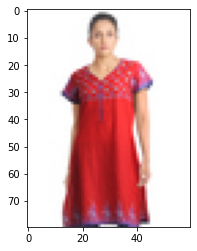

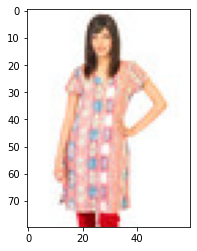

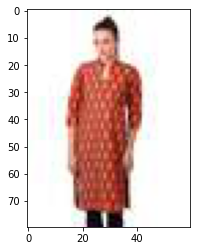

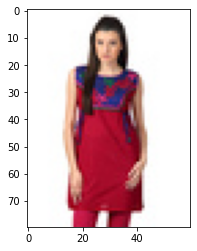

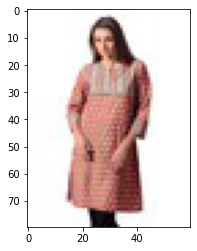

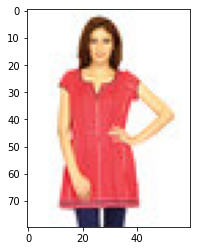

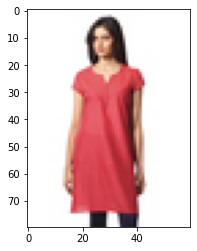

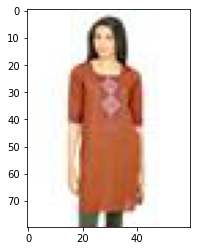

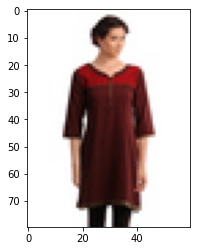

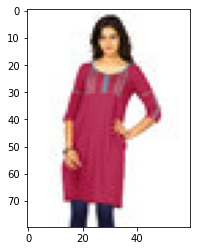

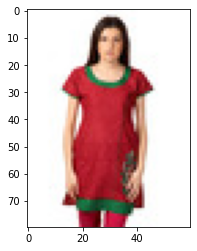

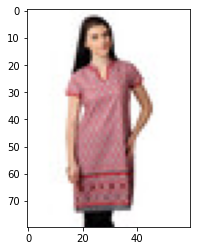

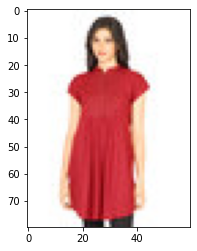

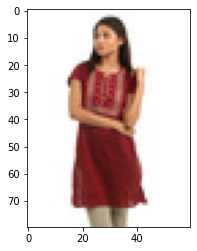

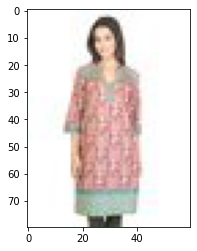

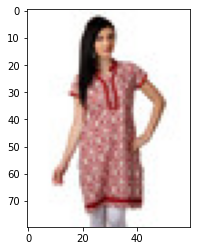

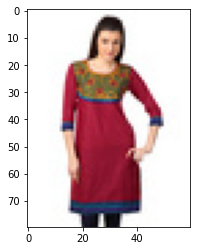

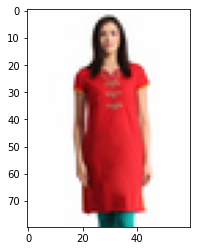

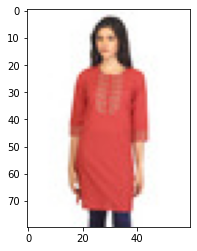

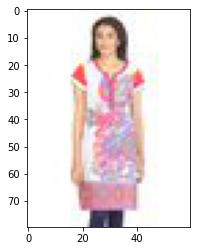

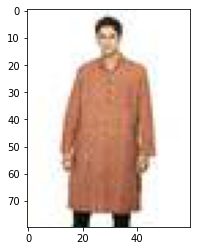

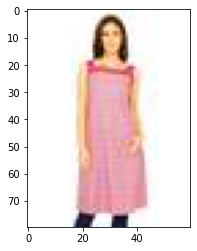

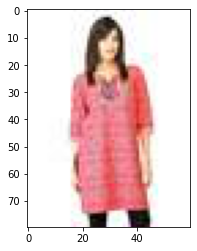

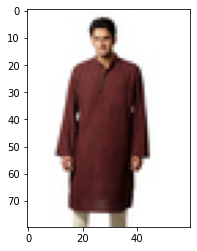

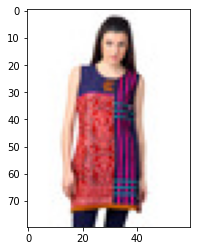

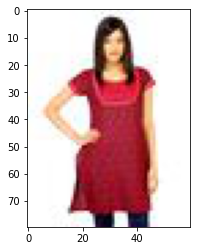

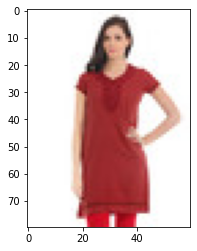

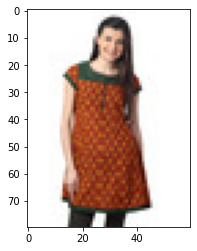

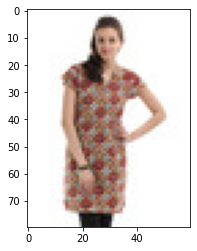

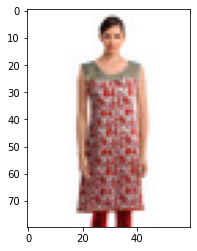

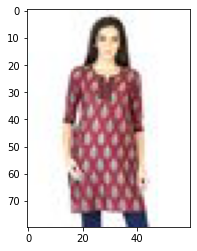

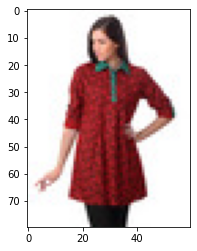

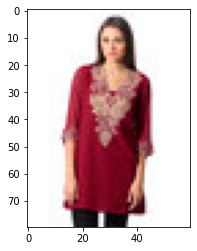

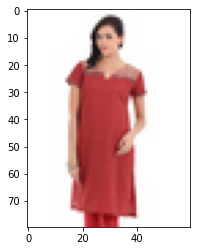

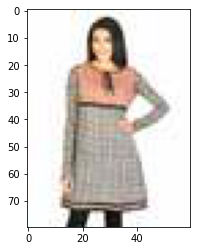

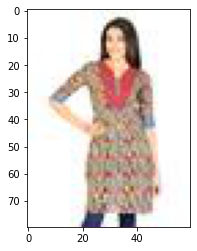

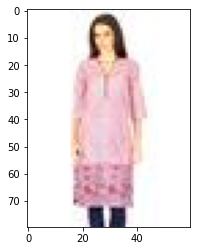

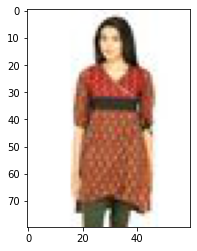

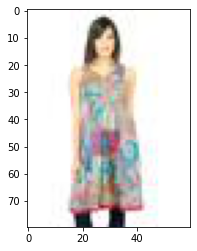

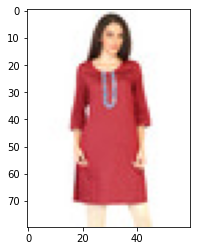

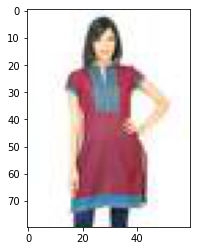

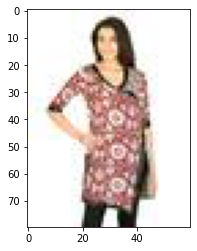

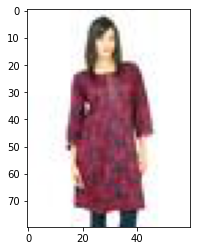

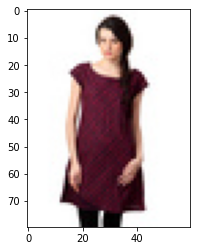

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for imageRec in range(len(indexMatch)):
    print(indexMatch[imageRec])
    productImageList=filterImage_masterCategory['productImage'].iloc[indexMatch[imageRec]]
    for image in range (len(productImageList)-1):
        ''''''
        img = mpimg.imread('./images/'+productImageList[image]+'.jpg')
        imgplot = plt.imshow(img)
        plt.show()
        
    
    
        

0.1998624019757394

['51009', '56416', '50964', '56300', '56294', '56292', '']